# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [3]:

data = pd.read_csv('Engineering_books_data.csv', sep=",")

In [4]:
# размер набора данных
data.shape

(2375, 10)

In [5]:
# типы колонок
data.dtypes


title             object
author            object
image             object
desc              object
download_link     object
pages            float64
publisher         object
year             float64
language          object
file              object
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

title              0
author            22
image              3
desc             624
download_link     79
pages            387
publisher        280
year             151
language          20
file               0
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file
0,"Soil Mechanics of Earthworks, Foundations and ...",NaN,https://covers.zlibcdn2.com/covers100/books/01...,\n This is the third volume...,https://1lib.in/dl/2279969/9cd462,354.0,Elsevier Science,1988.0,english,"PDF, 9.35 MB"
1,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB"
2,Practical Problems in Soil Mechanics and Found...,Sheng Y. Peng,https://covers.zlibcdn2.com/covers100/books/7d...,NaN,https://1lib.in/dl/2800423/3ccf77,346.0,Elsevier Science Ltd,1985.0,english,"PDF, 9.86 MB"
3,Underwater Embankments on Soft Soil A Case His...,William F. van Impe,https://covers.zlibcdn2.com/covers100/books/2b...,NaN,https://1lib.in/dl/981008/e79e1d,154.0,NaN,2007.0,english,"PDF, 3.35 MB"
4,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420.0,NaN,2007.0,english,"PDF, 10.67 MB"


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2375


# Обработка пропусков в данных

Удаление может производиться для группы строк или колонок.

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2375, 10), (2375, 2))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2375, 10), (1439, 10))

In [11]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file
0,"Soil Mechanics of Earthworks, Foundations and ...",NaN,https://covers.zlibcdn2.com/covers100/books/01...,\n This is the third volume...,https://1lib.in/dl/2279969/9cd462,354.0,Elsevier Science,1988.0,english,"PDF, 9.35 MB"
1,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB"
2,Practical Problems in Soil Mechanics and Found...,Sheng Y. Peng,https://covers.zlibcdn2.com/covers100/books/7d...,NaN,https://1lib.in/dl/2800423/3ccf77,346.0,Elsevier Science Ltd,1985.0,english,"PDF, 9.86 MB"
3,Underwater Embankments on Soft Soil A Case His...,William F. van Impe,https://covers.zlibcdn2.com/covers100/books/2b...,NaN,https://1lib.in/dl/981008/e79e1d,154.0,NaN,2007.0,english,"PDF, 3.35 MB"
4,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420.0,NaN,2007.0,english,"PDF, 10.67 MB"


# "Внедрение значений" - импьютация (imputation)

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка pages. Тип данных float64. Количество пустых значений 387, 16.29%.
Колонка year. Тип данных float64. Количество пустых значений 151, 6.36%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,pages,year
0,354.0,1988.0
1,256.0,2006.0
2,346.0,1985.0
3,154.0,2007.0
4,420.0,2007.0
...,...,...
2370,542.0,2009.0
2371,284.0,2013.0
2372,103.0,1999.0
2373,214.0,2007.0


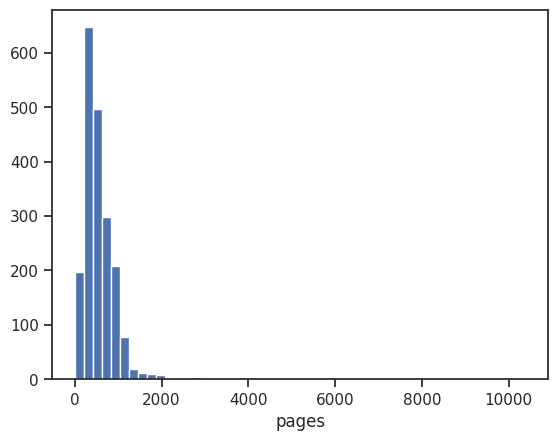

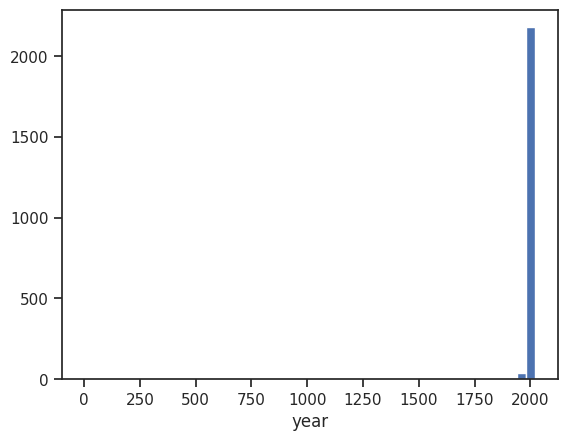

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
data_num_pages = data_num[['pages']]
data_num_pages.head()

,pages
0,354.0
1,256.0
2,346.0
3,154.0
4,420.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_pages)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_pages)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724346, 551.95724346, 551.95724346,
        551.95724346, 551.95724

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 464., 464., 464., 464., 464., 464., 464., 464.,
        464., 464., 464., 4

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 280., 280., 280., 280., 280., 280., 280., 280., 280.,
        280., 280., 

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['pages']].describe()

,pages
count,1988.000000
mean,551.957243
std,415.985931
min,1.000000
25%,306.000000
50%,464.000000
75%,728.000000
max,10388.000000


In [25]:
test_num_impute_col(data, 'pages', strategies[0])

('pages',
 'mean',
 387,
 np.float64(551.9572434607646),
 np.float64(551.9572434607646))

In [26]:
test_num_impute_col(data, 'pages', strategies[1])

('pages', 'median', 387, np.float64(464.0), np.float64(464.0))

In [27]:
test_num_impute_col(data, 'pages', strategies[2])

('pages', 'most_frequent', 387, np.float64(280.0), np.float64(280.0))

Обработка пропусков в категориальных данных

In [28]:

# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка author. Тип данных object. Количество пустых значений 22, 0.93%.
Колонка image. Тип данных object. Количество пустых значений 3, 0.13%.
Колонка desc. Тип данных object. Количество пустых значений 624, 26.27%.
Колонка download_link. Тип данных object. Количество пустых значений 79, 3.33%.
Колонка publisher. Тип данных object. Количество пустых значений 280, 11.79%.
Колонка language. Тип данных object. Количество пустых значений 20, 0.84%.


In [29]:
cat_temp_data = data[['language']]
cat_temp_data.head()

,language
0,english
1,english
2,english
3,english
4,english


In [30]:
cat_temp_data['language'].unique()


array(['english', nan, 'russian', 'English', 'chinese', 'french',
       'engish', 'romanian,moldavian,moldovan', 'german',
       'english, german'], dtype=object)

In [31]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['english'],
       ['english'],
       ['english'],
       ...,
       ['english'],
       ['english'],
       ['english']], dtype=object)

In [32]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['English', 'chinese', 'engish', 'english', 'english, german',
       'french', 'german', 'romanian,moldavian,moldovan', 'russian'],
      dtype=object)

In [33]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='spanish')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['english'],
       ['english'],
       ['english'],
       ...,
       ['english'],
       ['english'],
       ['english']], dtype=object)

In [34]:
np.unique(data_imp3)

array(['English', 'chinese', 'engish', 'english', 'english, german',
       'french', 'german', 'romanian,moldavian,moldovan', 'russian',
       'spanish'], dtype=object)

Преобразование категориальных признаков в числовые

In [35]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,english
1,english
2,english
3,english
4,english
...,...
2370,english
2371,english
2372,english
2373,english


In [36]:
cat_enc['c1'].unique()

array(['english', 'russian', 'English', 'chinese', 'french', 'engish',
       'romanian,moldavian,moldovan', 'german', 'english, german'],
      dtype=object)

In [37]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [38]:
le.classes_

array(['English', 'chinese', 'engish', 'english', 'english, german',
       'french', 'german', 'romanian,moldavian,moldovan', 'russian'],
      dtype=object)

In [39]:
cat_enc_le


array([3, 3, 3, ..., 3, 3, 3])

In [40]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Масштабирование данных

In [41]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['pages']])

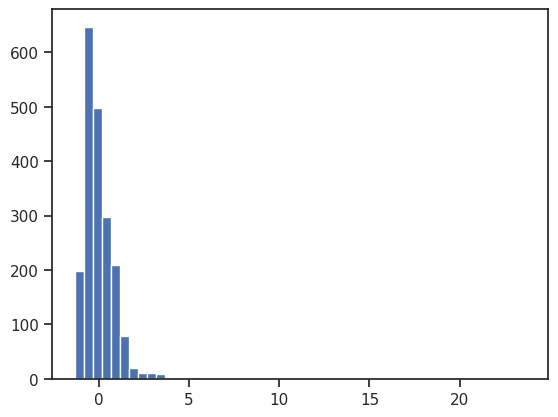

In [42]:
plt.hist(sc2_data, 50)
plt.show()